In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### Data Analysis and Data Preprocessing

In [6]:
data = pd.read_csv("diabetes.csv")

In [8]:
df = data.copy()

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [27]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
# Sonuçlara göre diğer variable'ların ortalamaları
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [26]:
# Outcome değişkenine en çok etki eden değişkenlerin sıralaması
df.corr()["Outcome"].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

C:\Users\kerim\anaconda3\envs\project_1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

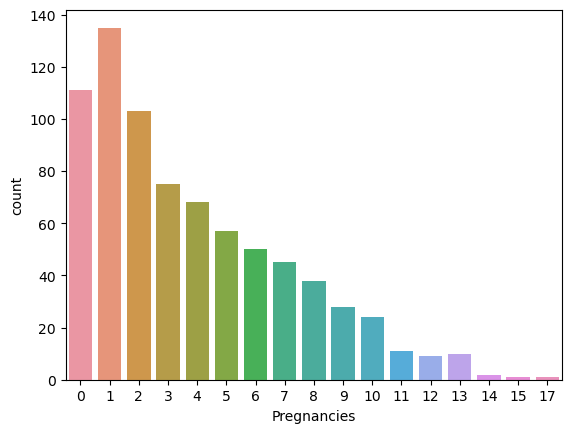

In [18]:
sns.countplot(df["Pregnancies"])

C:\Users\kerim\anaconda3\envs\project_1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

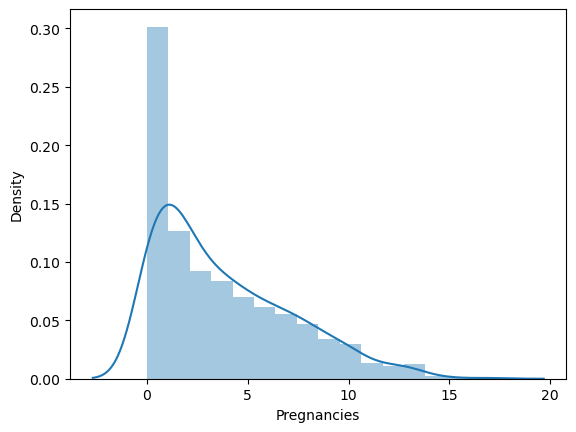

In [19]:
sns.distplot(df["Pregnancies"])

C:\Users\kerim\anaconda3\envs\project_1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

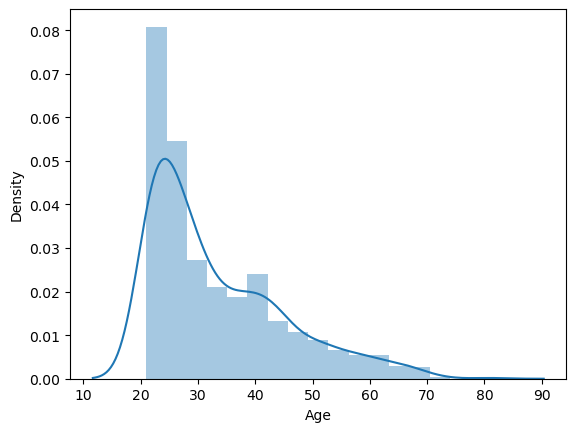

In [23]:
sns.distplot(df["Age"])

### Data Cleansing

* "Pregnancie" ve "Age" variable'larının aykırı değerlerin temizlenmesi
* Boş değerlerin ortalama ile doldurulması

In [28]:
df.shape

(768, 9)

In [44]:
len(df) * 0.01

7.68

In [ ]:
# Aykırı değerlerin temizlenmesi

In [109]:
c_df = df.sort_values("Pregnancies", ascending=False).iloc[16:]

In [45]:
c_df = df.sort_values("Age", ascending=False).iloc[16:]

In [46]:
c_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,752.0,3.827128,3.382324,0.000,1.0000,3.0000,6.00000,17.00
Glucose,752.0,120.550532,31.834126,0.000,99.0000,116.5000,140.00000,199.00
BloodPressure,752.0,68.982713,19.251879,0.000,62.0000,72.0000,80.00000,122.00
SkinThickness,752.0,20.856383,15.871844,0.000,0.0000,23.0000,32.00000,99.00
Insulin,752.0,81.417553,115.904277,0.000,0.0000,39.0000,130.00000,846.00
BMI,752.0,32.084176,7.827799,0.000,27.4000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,752.0,0.472399,0.333336,0.078,0.2425,0.3725,0.62625,2.42
Age,752.0,32.500000,10.702862,21.000,24.0000,29.0000,40.00000,64.00
Outcome,752.0,0.351064,0.477621,0.000,0.0000,0.0000,1.00000,1.00


C:\Users\kerim\anaconda3\envs\project_1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

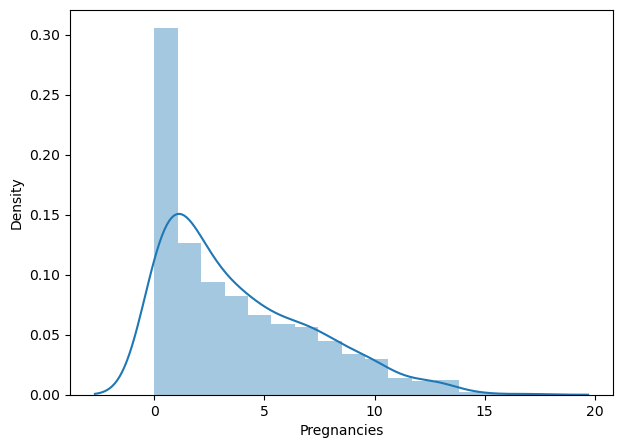

In [47]:
plt.figure(figsize=(7,5))
sns.distplot(c_df["Pregnancies"])

C:\Users\kerim\anaconda3\envs\project_1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

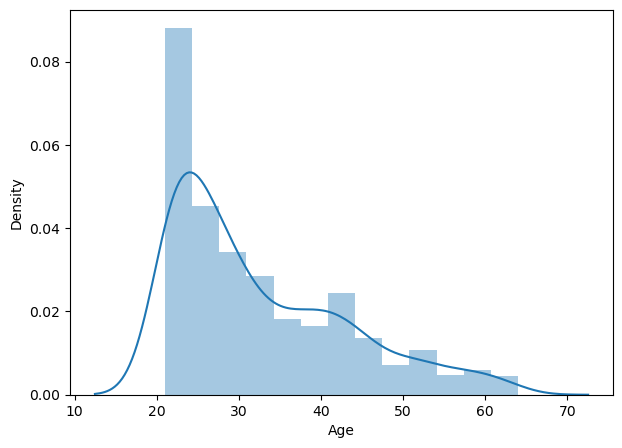

In [48]:
plt.figure(figsize=(7,5))
sns.distplot(c_df["Age"])

In [50]:
# 0 Değerlerinin ortalama ile doldurulması
c_df.eq(0).sum()

Pregnancies                 109
Glucose                       5
BloodPressure                34
SkinThickness               214
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Outcome                     488
dtype: int64

In [59]:
# 0 değerine sahip verilerin NaN döndürülmesi
c_df[["Age", "DiabetesPedigreeFunction", "BMI", "Insulin", "SkinThickness", "BloodPressure", "Glucose"]] = c_df[["Age", "DiabetesPedigreeFunction", "BMI", "Insulin", "SkinThickness", "BloodPressure", "Glucose"]].replace(0, np.NaN)


In [60]:
c_df.fillna(c_df.mean(), inplace=True)

In [61]:
c_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
509,8,120.0,78.0,29.152416,155.791349,25.0,0.409,64,0
361,5,158.0,70.0,29.152416,155.791349,29.8,0.207,63,0
263,3,142.0,80.0,15.000000,155.791349,32.4,0.200,63,0
479,4,132.0,86.0,31.000000,155.791349,28.0,0.419,63,0
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0


In [62]:
c_df.eq(0).sum()

Pregnancies                 109
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     488
dtype: int64

In [63]:
df = c_df

In [65]:
X = df.drop(columns = "Outcome", axis=1)
y = df["Outcome"]

In [66]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
509,8,120.0,78.0,29.152416,155.791349,25.0,0.409,64
361,5,158.0,70.0,29.152416,155.791349,29.8,0.207,63
263,3,142.0,80.0,15.000000,155.791349,32.4,0.200,63
479,4,132.0,86.0,31.000000,155.791349,28.0,0.419,63
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
...,...,...,...,...,...,...,...,...
240,1,91.0,64.0,24.000000,155.791349,29.2,0.192,21
136,0,100.0,70.0,26.000000,50.000000,30.8,0.597,21
382,1,109.0,60.0,8.000000,182.000000,25.4,0.947,21
392,1,131.0,64.0,14.000000,415.000000,23.7,0.389,21


In [67]:
y

509    0
361    0
263    0
479    0
763    0
      ..
240    0
136    0
382    0
392    0
271    0
Name: Outcome, Length: 752, dtype: int64

### Data Standardization

In [68]:
scaler = StandardScaler()

In [69]:
scaler.fit(X)

StandardScaler()

In [70]:
standardized_data = scaler.transform(X)

In [71]:
standardized_data

array([[ 1.23455047, -0.04488034,  0.47789295, ..., -1.09269521,
        -0.1903217 ,  2.94509671],
       [ 0.34699602,  1.21150373, -0.18692107, ..., -0.39491254,
        -0.79671962,  2.85160158],
       [-0.24470694,  0.68249991,  0.64409646, ..., -0.01694693,
        -0.81773341,  2.85160158],
       ...,
       [-0.83640991, -0.40857047, -1.01793861, ..., -1.03454665,
         1.42473811, -1.07519404],
       [-0.83640991,  0.31880978, -0.68553159, ..., -1.28167801,
        -0.2503611 , -1.07519404],
       [-0.54055843, -0.44163321, -0.8517351 , ..., -1.06362093,
        -1.03387524, -1.07519404]])

In [72]:
X = standardized_data
y = df["Outcome"]

### Train Test Split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify = y, random_state = 42)

In [74]:
X_train.shape

(503, 8)

In [76]:
X_test.shape

(249, 8)

### Training the Model

In [78]:
classifier = svm.SVC(kernel = 'linear')

In [80]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

### Model Evaluation

In [81]:
X_train_prediction = classifier.predict(X_train)
training_data = accuracy_score(X_train_prediction, y_train)

In [82]:
training_data

0.7773359840954275

In [84]:
X_test_prediction = classifier.predict(X_test)
test_data = accuracy_score(X_test_prediction, y_test)

In [85]:
test_data

0.7751004016064257

### Create Prediction


In [105]:
input_data = (0,180,66,39,0,42,1.893,25)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[-1.13226139  1.93888399 -0.51932809  1.1110721  -1.81587765  1.37861839
   4.26460165 -0.7012135 ]]


C:\Users\kerim\anaconda3\envs\project_1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [106]:
prediction = classifier.predict(std_data)
print(prediction)

[1]


In [107]:
if prediction[0] == 0:
    print("The person is not diabetic")
    
else:
    print("the person is diabetic")


the person is diabetic
